### This Notebook contains the details of the visualization and analyis of the Popular electric vehcicle data set from the state.
#### Data Visualizations and Regression.

##### Step 1:  Import Required libraries


In [1]:
import pandas as pd
import numpy as np

from bokeh.plotting import figure, show    
from bokeh.io import output_notebook       
from bokeh.models import ColumnDataSource  # We will need this when preparing our data for a bar/column plot

import matplotlib.pyplot as plt
import seaborn as sns


output_notebook()  

Loading BokehJS ...

In [2]:
#Ref Dataset: https://catalog.data.gov/dataset/electric-vehicle-population-data
df = pd.read_csv(r'Electric_Vehicle_Population_Data.csv')
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


#### Step 2: Data Cleaning

In [3]:
#View columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
print("Null count per column:")
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"{column}: {null_count}")

Null count per column:
VIN (1-10): 0
County: 5
City: 5
State: 0
Postal Code: 5
Model Year: 0
Make: 0
Model: 0
Electric Vehicle Type: 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 0
Electric Range: 0
Base MSRP: 0
Legislative District: 389
DOL Vehicle ID: 0
Vehicle Location: 9
Electric Utility: 5
2020 Census Tract: 5


In [5]:
df = df.dropna(subset=['Legislative District', 'Vehicle Location'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

In [6]:
## Rechecking for null values again
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"{column}: {null_count}")

VIN (1-10): 0
County: 0
City: 0
State: 0
Postal Code: 0
Model Year: 0
Make: 0
Model: 0
Electric Vehicle Type: 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 0
Electric Range: 0
Base MSRP: 0
Legislative District: 0
DOL Vehicle ID: 0
Vehicle Location: 0
Electric Utility: 0
2020 Census Tract: 0


In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177473.000000,177473.000000,177473.000000,177473.000000,177473.000000,1.774730e+05,1.774730e+05
mean,98260.199332,2020.517115,58.826548,1070.609839,29.127710,2.202527e+08,5.303981e+10
std,303.694979,2.989179,91.973457,8346.920672,14.892259,7.585304e+07,1.620333e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.815241e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282691e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548504e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


#### Step 3: Feature Exploration and Feature engineering


In [8]:
#Examining State for unique Valaues
df['State'].unique()

array(['WA'], dtype=object)

In [9]:
# Since the state column has only one value 'WA', the column is not useful. Will drop it and move on to County
df= df.drop(['State'], axis= 1)
df['County'].unique()

array(['King', 'Snohomish', 'Kitsap', 'Thurston', 'Yakima', 'Island',
       'Chelan', 'Skagit', 'Spokane', 'Walla Walla', 'Grant', 'Stevens',
       'Whitman', 'Kittitas', 'Pend Oreille', 'Clark', 'Cowlitz',
       'Jefferson', 'Clallam', 'Klickitat', 'Pierce', 'Grays Harbor',
       'Whatcom', 'Skamania', 'Wahkiakum', 'Benton', 'Franklin', 'Lewis',
       'San Juan', 'Mason', 'Okanogan', 'Douglas', 'Adams', 'Pacific',
       'Asotin', 'Columbia', 'Lincoln', 'Ferry', 'Garfield'], dtype=object)

There are 2 more columns that point to Location: City, and State. So will create a new column Location which is a concatenation of  City and State columns, with each value separated by a comma.
df['Location'] = df['County'] + ', ' + df['City'] + ', ' + df['State']

In [10]:
df['Location'] = df['County']+ ', ' + df['City']

len (df['Location'].unique())

511

In [11]:
df.columns


Index(['VIN (1-10)', 'County', 'City', 'Postal Code', 'Model Year', 'Make',
       'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Location'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   Postal Code                                        177473 non-null  float64
 4   Model Year                                         177473 non-null  int64  
 5   Make                                               177473 non-null  object 
 6   Model                                              177473 non-null  object 
 7   Electric Vehicle Type                              177473 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  177473 non-null  object 
 9 

In [13]:
#convert some float columns to int, to include them in correlatin
df['Postal Code'] = df['Postal Code'].astype(int)
df['Legislative District'] = df['Legislative District'].astype(int)

In [14]:
cols_to_check = ['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Print unique values for each column using a for loop
for column in cols_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Electric Vehicle Type': ['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']
Unique values in column 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': ['Clean Alternative Fuel Vehicle Eligible'
 'Eligibility unknown as battery range has not been researched'
 'Not eligible due to low battery range']


In [15]:
make_groups = df.groupby('Make') # Creates a grouping of the DataFrame by column 'make'
EVType_groups = df.groupby('Electric Vehicle Type') # Creates a grouping of the df by EV tyoe
EVCAF_groups = df.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')

Creating Electric ange groups based on Base MSRP values

In [16]:
df['Base MSRP'].value_counts()

Base MSRP
0         174142
69900       1366
31950        381
52900        222
32250        136
59900        127
54950        126
39995        111
36900        104
44100         91
45600         82
64950         81
33950         76
52650         68
34995         65
36800         55
55700         54
53400         37
81100         23
110950        20
98950         19
90700         18
75095         13
102000        12
184400        10
43700         10
89100          8
109000         7
91250          5
32995          3
845000         1
Name: count, dtype: int64

The 'Electric_Range_Category' column has a range of valuees so will group based on observations.
By creating this new column, we can better understand the distribution of electric vehicle ranges in our dataset and account for the potential uncertainty introduced by the large number of 0 values in the 'Electric Range' column.

In [19]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

df = create_electric_range_category(df, column='Electric Range')

df.head(1)

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Location,Electric_Range_Category
0,5YJYGDEE1L,King,Seattle,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,"King, Seattle",Medium


#### Step 4: Visualizations 

##### Top Electric Vehicles by distribution - Bokeh

In [20]:
#Import Bokeh libraries
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256
from bokeh.palettes import Bright6

# Count the number of electric vehicles by make and get the top 12 makes
ev_counts_by_make = df['Make'].value_counts().nlargest(12)
ev_counts_by_make = ev_counts_by_make[::-1] #To ensure plots are sorted from highest to lowest

# Creating Bokeh figure
p = figure(y_range=list(ev_counts_by_make.index), height=400, width=600, title="Top 10 Electric Vehicle Makes by Number of Electric Vehicles",
           toolbar_location=None, tools="")

source = ColumnDataSource(data=dict(make=list(ev_counts_by_make.index), counts=ev_counts_by_make.values))

# Define a smaller palette with 10 colors
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting horizontal bars for each make
p.hbar(y='make', right='counts', height=0.8, source=source, line_color="white",
       fill_color=factor_cmap('make', palette=palette, factors=list(ev_counts_by_make.index)))

# plot with labels
p.xaxis.axis_label = "Number of Vehicles"
p.yaxis.axis_label = "Make"

# Show  plot
show(p)

##### We can see clearly that Tesla has the highest distribution of electric vehicles in the state of California

#### Visual 2: Trend of Electric Vehicle over the years - Bokeh

In [21]:
len(df['DOL Vehicle ID'].unique())
#This is the unique Identifier column in the data

177473

In [22]:
#Using DOL Vehicle ID as it is the unique Identifier column in the data
ev_counts = df['DOL Vehicle ID'].count() # The count of unique EVs
ev_counts

177473

In [23]:


# Calculate the count of unique EVs per year
ev_counts = df['Model Year'].value_counts().sort_index()

# Convert 'Model Year' index to string for Bokeh interpretation
Year = ev_counts.index.astype(str)

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(Year=Year, ev_counts=ev_counts))

# Create Bokeh figure
visual = figure(height=600, width=600, title="Yearly Distribution of EV vehicles",
                x_axis_label="Year", y_axis_label="Count of EVs")

# Plot line chart
visual.line(x='Year', y='ev_counts', line_width=2, source=source)

# Show the plot
show(visual)


We can see from the  visual that there was a spike in EV Vehicles in 2023 compared to other years.

In [24]:
# Count the number of electric vehicles by make and get the top 10 makes
ev_counts_by_location = df['Location'].value_counts().nlargest(12)
ev_counts_by_location = ev_counts_by_location[::-1] #To ensure plots are sorted from highest to lowest

# Creating Bokeh figure
p = figure(y_range=list(ev_counts_by_location.index), height=400, width=600, 
                     title="Top 12 Locations with the highest Number of Electric Vehicles",
           toolbar_location=None, tools="")

source = ColumnDataSource(data=dict(make=list(ev_counts_by_location.index), counts=ev_counts_by_location.values))

# Define a smaller palette with 10 colors
colors = ['#256676', '#5cdac5', '#277a35', '#70de63', '#333a9e', '#e057e1', '#d0bcfe', '#6a7fd2', '#99ceeb', '#6a10a6', '#991c64', '#573f56']

# Plotting horizontal bars for each make
p.hbar(y='make', right='counts', height=0.8, source=source, line_color="white", fill_color=factor_cmap('make', palette=colors,
               factors=list(ev_counts_by_make.index)))

# Customize plot with labels
p.xaxis.axis_label = "Number of Vehicles"
p.yaxis.axis_label = "Make"

# Show the plot
show(p)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


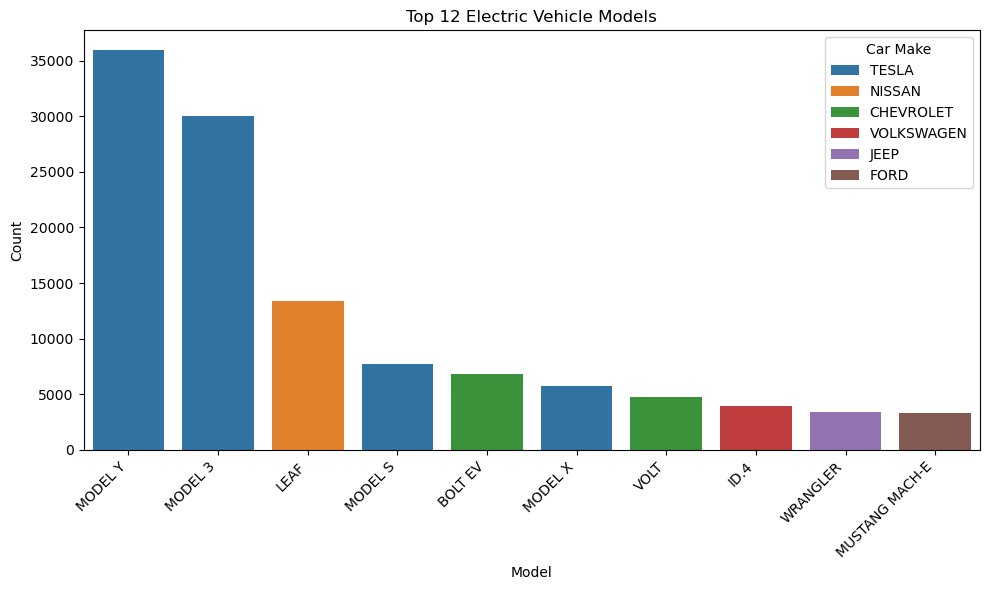

In [26]:
model_counts = df['Model'].value_counts().head(10)  # Select the top 10 models

make_dict = {}
for model in model_counts.index:
    makes = df[df['Model'] == model]['Make'].unique()
    make_dict[model] = ', '.join(makes)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts.index, y=model_counts.values, hue=[make_dict[model] for model in model_counts.index], dodge=False)
plt.title('Top 12 Electric Vehicle Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Make', )
plt.tight_layout()
plt.show()

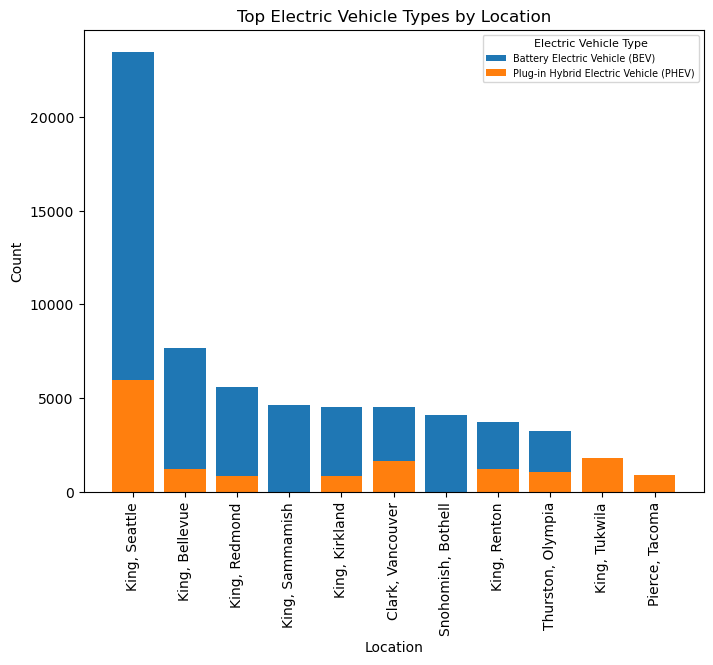

In [27]:
plt.figure(figsize=(8, 6))

top_locations_by_EVtype = {}

for ev_type in df['Electric Vehicle Type'].unique():
    ev_type_data = df[df['Electric Vehicle Type'] == ev_type]
    location_counts = ev_type_data['Location'].value_counts().head(9) 
    plt.bar(location_counts.index, location_counts.values, label=ev_type)
    
    top_locations_by_EVtype[ev_type] = location_counts.index.tolist()

plt.title('Top Electric Vehicle Types by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)

top_legend_labels = [f"{ev_type}" for ev_type in df['Electric Vehicle Type'].unique()]

plt.legend(top_legend_labels, title='Electric Vehicle Type', title_fontsize=8, fontsize='x-small', bbox_to_anchor=(1, 1), loc='upper right')

plt.show()

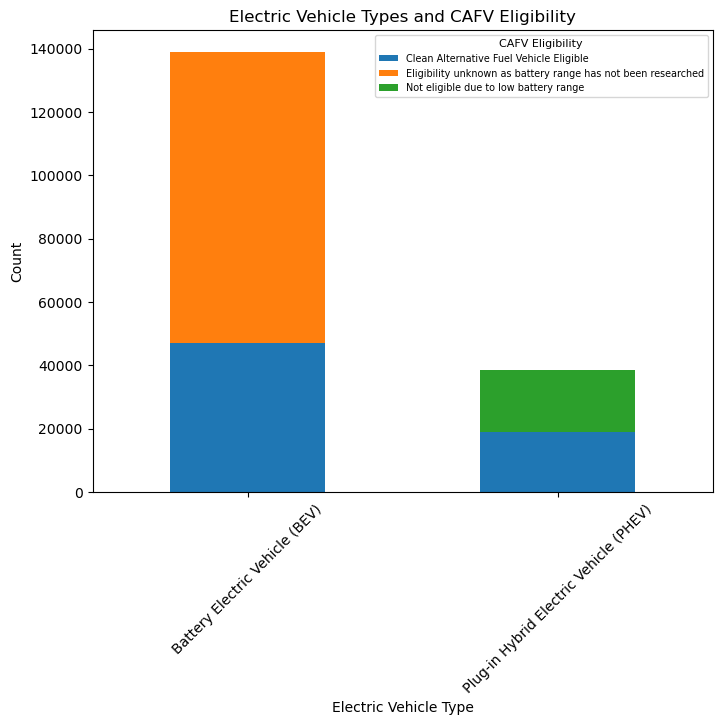

In [28]:
ev_type_cafv =df.groupby(['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['Electric Vehicle Type'].count().unstack()
ev_type_cafv.plot(kind='bar', stacked=True, figsize=(8, 6) )
plt.legend(title='CAFV Eligibility', title_fontsize=8, fontsize='x-small', bbox_to_anchor=(1, 1), loc='upper right')

plt.title('Electric Vehicle Types and CAFV Eligibility')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
Postal Code                                            int32
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                   int32
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                    float64
Location                

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


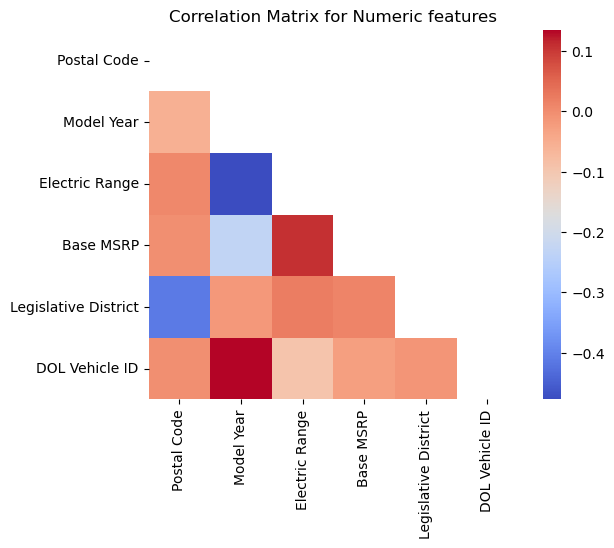

<Figure size 800x600 with 0 Axes>

In [35]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'int32'])
# Create a correlation heatmap for the numeric columns
#sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, mask=mask)

# Adjust aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Correlation Matrix for Numeric features')

plt.figure(figsize=(8, 6))

# Plot correlation matrix
plt.show()


In [ ]:
### Next is the maps to be plotted from location coordinates